# Data Exploration
Taking a look at the raw dataset that we have.

The `0-Data-Encoder.ipynb` file should have been run before this, and, as a result, the `encoded-data.csv` file should have been generated.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
raw_df = pd.read_csv("../data/encoded-data.csv")
raw_df

,label,hash,dim-00,dim-01,dim-02,dim-03,dim-04,dim-05,dim-06,dim-07,...,dim-22,dim-23,dim-24,dim-25,dim-26,dim-27,dim-28,dim-29,dim-30,dim-31
0,TRICKBOT,f16631469eb35406ef4049d30c763cadda571b25bbdb45...,0.0,0.0,10.972300,2.885305,21.913673,17.404490,0.000000,3.189547,...,3.339754,11.345241,10.217216,0.0,8.646901,7.429351,0.0,0.589822,2.902267,7.847453
1,DARKKOMET,d31a7102cbc54447c251ba62760eb484fd0c9fbb8ea54f...,0.0,0.0,14.415304,4.064499,0.000000,0.000000,0.000000,4.895772,...,27.048859,0.000000,0.000000,0.0,5.451469,0.000000,0.0,0.000000,0.000000,0.000000
2,SALITY,e7fc7de574f44a966b198b7625bd6c595cad05bd669619...,0.0,0.0,3.820209,10.740729,19.335210,11.758485,4.437401,2.915592,...,0.000000,8.018223,8.416088,0.0,5.019428,11.775135,0.0,4.377707,6.175408,10.492670
3,ADPOSHEL,fb576aea86528eaa082efbd073a7d4a6d1c2006da9ba49...,0.0,0.0,8.412471,10.441654,15.629947,17.034916,0.000000,9.448081,...,9.632441,9.655011,0.000000,0.0,1.130099,22.912333,0.0,0.420097,8.013490,7.985942
4,VEBZENPAK,4519186b8fb2eaa847255087b44f918928c20e97c2fbea...,0.0,0.0,12.083241,5.210299,4.146192,0.000000,3.693242,0.000000,...,3.001556,5.981415,0.000000,0.0,11.143324,7.870592,0.0,1.047571,7.732687,9.557245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3400,BENIGN,949485ba939953642714ae6831d7dcb261691cac7cbb8c...,0.0,0.0,14.865146,0.000000,12.656031,10.862475,0.000000,1.560311,...,7.080616,14.706267,9.744629,0.0,14.676599,10.897608,0.0,6.653806,7.396491,9.737051
3401,MANSABO,78514a632682d1c07ee4f782302bb6a74f2676f1a91b56...,0.0,0.0,15.995253,8.931343,0.000000,0.000000,0.000000,0.776199,...,19.978464,0.000000,0.000000,0.0,14.486612,7.519233,0.0,4.901716,0.000000,0.000000
3402,TRICKBOT,46401903e85a5c457490a6934ec4dc61fdf28df83af377...,0.0,0.0,19.242435,6.165306,0.000000,0.000000,0.000000,0.000000,...,12.655314,0.000000,4.641536,0.0,13.977305,9.326521,0.0,3.943131,0.305355,0.000000
3403,TRICKBOT,7eca38a5d0098a7ca4baa1faca43b80b5f911b7580273b...,0.0,0.0,15.900613,12.053199,0.000000,2.927987,0.000000,7.671630,...,7.707015,0.000000,0.571737,0.0,12.846194,14.289655,0.0,9.746999,3.683667,0.941641


What is the distribution of each of the families?

In [3]:
raw_df["label"].value_counts()

label
BENIGN          377
TRICKBOT        190
TROJAN          150
COBALTSTRIKE    130
MIRAI           122
               ... 
TABUVYS           1
LIMERAT           1
STREAMER          1
FAKEFLASH         1
DOINA             1
Name: count, Length: 521, dtype: int64

Remove the `BENIGN` class.

In [4]:
df = raw_df[raw_df["label"] != "BENIGN"].reset_index(drop=True)
df

,label,hash,dim-00,dim-01,dim-02,dim-03,dim-04,dim-05,dim-06,dim-07,...,dim-22,dim-23,dim-24,dim-25,dim-26,dim-27,dim-28,dim-29,dim-30,dim-31
0,TRICKBOT,f16631469eb35406ef4049d30c763cadda571b25bbdb45...,0.0,0.0,10.972300,2.885305,21.913673,17.404490,0.000000,3.189547,...,3.339754,11.345241,10.217216,0.0,8.646901,7.429351,0.0,0.589822,2.902267,7.847453
1,DARKKOMET,d31a7102cbc54447c251ba62760eb484fd0c9fbb8ea54f...,0.0,0.0,14.415304,4.064499,0.000000,0.000000,0.000000,4.895772,...,27.048859,0.000000,0.000000,0.0,5.451469,0.000000,0.0,0.000000,0.000000,0.000000
2,SALITY,e7fc7de574f44a966b198b7625bd6c595cad05bd669619...,0.0,0.0,3.820209,10.740729,19.335210,11.758485,4.437401,2.915592,...,0.000000,8.018223,8.416088,0.0,5.019428,11.775135,0.0,4.377707,6.175408,10.492670
3,ADPOSHEL,fb576aea86528eaa082efbd073a7d4a6d1c2006da9ba49...,0.0,0.0,8.412471,10.441654,15.629947,17.034916,0.000000,9.448081,...,9.632441,9.655011,0.000000,0.0,1.130099,22.912333,0.0,0.420097,8.013490,7.985942
4,VEBZENPAK,4519186b8fb2eaa847255087b44f918928c20e97c2fbea...,0.0,0.0,12.083241,5.210299,4.146192,0.000000,3.693242,0.000000,...,3.001556,5.981415,0.000000,0.0,11.143324,7.870592,0.0,1.047571,7.732687,9.557245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3023,TRICKBOT,020991f3452c6bdac2bd66e60174966bad7b7c201c7907...,0.0,0.0,13.221725,4.482760,2.375473,0.000000,4.333795,1.465900,...,2.147225,0.000000,3.746896,0.0,11.640550,2.526880,0.0,0.592801,4.686705,8.064886
3024,MANSABO,78514a632682d1c07ee4f782302bb6a74f2676f1a91b56...,0.0,0.0,15.995253,8.931343,0.000000,0.000000,0.000000,0.776199,...,19.978464,0.000000,0.000000,0.0,14.486612,7.519233,0.0,4.901716,0.000000,0.000000
3025,TRICKBOT,46401903e85a5c457490a6934ec4dc61fdf28df83af377...,0.0,0.0,19.242435,6.165306,0.000000,0.000000,0.000000,0.000000,...,12.655314,0.000000,4.641536,0.0,13.977305,9.326521,0.0,3.943131,0.305355,0.000000
3026,TRICKBOT,7eca38a5d0098a7ca4baa1faca43b80b5f911b7580273b...,0.0,0.0,15.900613,12.053199,0.000000,2.927987,0.000000,7.671630,...,7.707015,0.000000,0.571737,0.0,12.846194,14.289655,0.0,9.746999,3.683667,0.941641


Keep only the samples whose label have at least `KEEP_THRESHOLD` occurences.

In [5]:
KEEP_THRESHOLD = 10

counts = df["label"].value_counts(dropna=False) 
keep_labels = counts[counts >= KEEP_THRESHOLD].index
df = df[df["label"].isin(keep_labels)].reset_index(drop=True)
df

,label,hash,dim-00,dim-01,dim-02,dim-03,dim-04,dim-05,dim-06,dim-07,...,dim-22,dim-23,dim-24,dim-25,dim-26,dim-27,dim-28,dim-29,dim-30,dim-31
0,TRICKBOT,f16631469eb35406ef4049d30c763cadda571b25bbdb45...,0.0,0.0,10.972300,2.885305,21.913673,17.404490,0.000000,3.189547,...,3.339754,11.345241,10.217216,0.0,8.646901,7.429351,0.0,0.589822,2.902267,7.847453
1,DARKKOMET,d31a7102cbc54447c251ba62760eb484fd0c9fbb8ea54f...,0.0,0.0,14.415304,4.064499,0.000000,0.000000,0.000000,4.895772,...,27.048859,0.000000,0.000000,0.0,5.451469,0.000000,0.0,0.000000,0.000000,0.000000
2,SALITY,e7fc7de574f44a966b198b7625bd6c595cad05bd669619...,0.0,0.0,3.820209,10.740729,19.335210,11.758485,4.437401,2.915592,...,0.000000,8.018223,8.416088,0.0,5.019428,11.775135,0.0,4.377707,6.175408,10.492670
3,VEBZENPAK,4519186b8fb2eaa847255087b44f918928c20e97c2fbea...,0.0,0.0,12.083241,5.210299,4.146192,0.000000,3.693242,0.000000,...,3.001556,5.981415,0.000000,0.0,11.143324,7.870592,0.0,1.047571,7.732687,9.557245
4,COBALTSTRIKE,dab956e9c864a84d12e8106a24ac3cf2950394152c62b6...,0.0,0.0,1.316455,4.444321,3.204388,0.000000,0.000000,0.000000,...,0.000000,1.693722,0.000000,0.0,0.000000,10.151480,0.0,3.554387,9.430399,8.058870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945,TRICKBOT,0c6aa0ae05d5fa8bf5a8ea95310be73ee60e55a0ce6864...,0.0,0.0,10.057159,10.175566,3.268311,0.000000,5.307435,6.613563,...,2.080789,0.000000,0.869716,0.0,12.583891,9.859617,0.0,0.117355,11.487420,5.953594
1946,TRICKBOT,020991f3452c6bdac2bd66e60174966bad7b7c201c7907...,0.0,0.0,13.221725,4.482760,2.375473,0.000000,4.333795,1.465900,...,2.147225,0.000000,3.746896,0.0,11.640550,2.526880,0.0,0.592801,4.686705,8.064886
1947,MANSABO,78514a632682d1c07ee4f782302bb6a74f2676f1a91b56...,0.0,0.0,15.995253,8.931343,0.000000,0.000000,0.000000,0.776199,...,19.978464,0.000000,0.000000,0.0,14.486612,7.519233,0.0,4.901716,0.000000,0.000000
1948,TRICKBOT,46401903e85a5c457490a6934ec4dc61fdf28df83af377...,0.0,0.0,19.242435,6.165306,0.000000,0.000000,0.000000,0.000000,...,12.655314,0.000000,4.641536,0.0,13.977305,9.326521,0.0,3.943131,0.305355,0.000000


What is the distribution of classes now?

In [6]:
df["label"].value_counts()

label
TRICKBOT        190
TROJAN          150
COBALTSTRIKE    130
MIRAI           122
GAFGYT           97
               ... 
AVEMARIA         10
OPENCANDY        10
VEBZENPAK        10
COROXY           10
QSHELL           10
Name: count, Length: 63, dtype: int64

<Axes: xlabel='count', ylabel='label'>

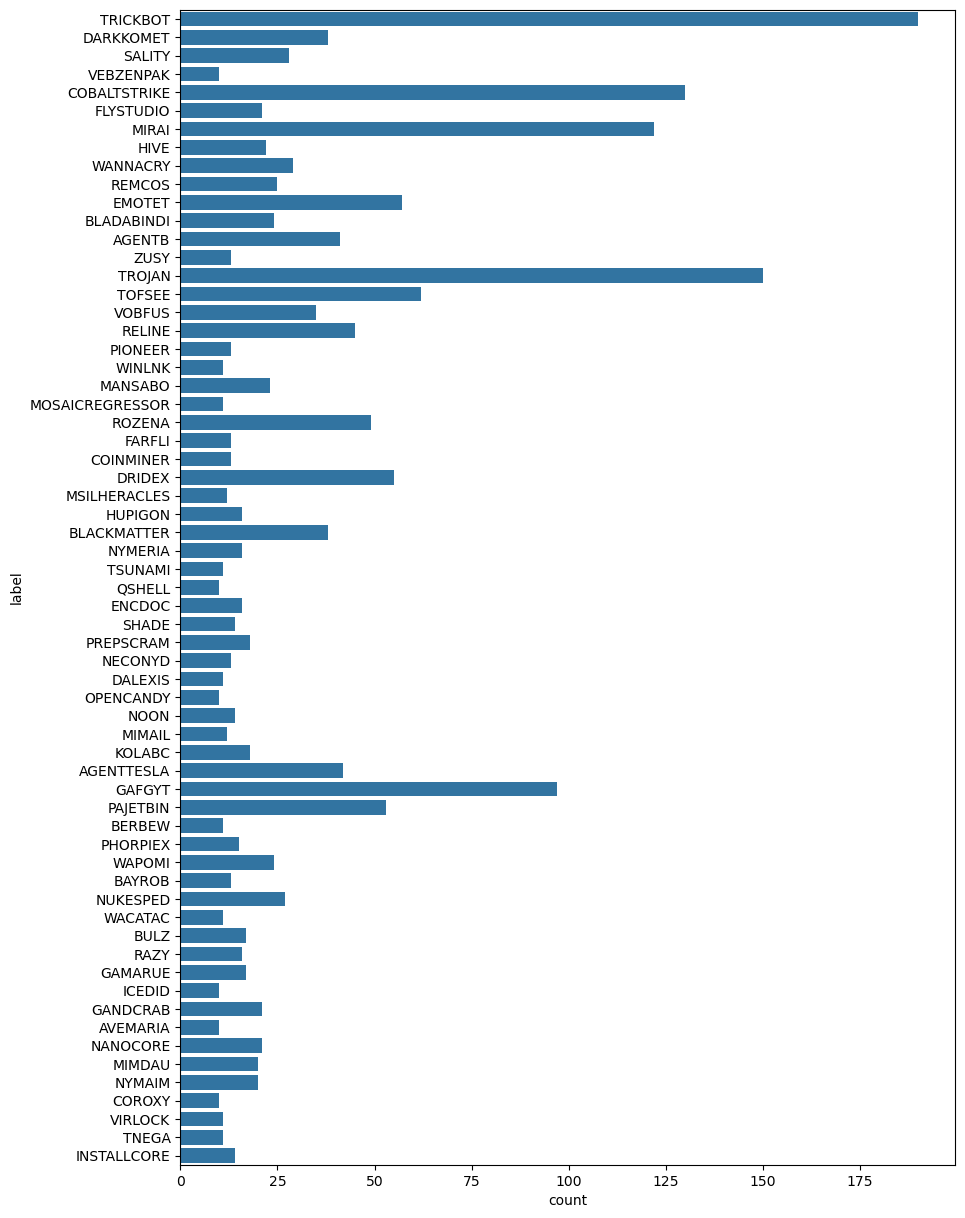

In [7]:
plt.figure(figsize = (10, 15))
sns.countplot(data=df["label"])

Save the updated data.

In [8]:
df.to_csv("../data/processed-data.csv", index=False)